In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Feature Engineering
1. Length of Questions
2. Number of words in Questions
3. Number of common words
4. Total number of words in Q1 and Q2
5. Word share = Word common / Word total



In [84]:
df=pd.read_csv('sample.csv' ,nrows=30000)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30000 non-null  int64 
 1   id            30000 non-null  int64 
 2   qid1          30000 non-null  int64 
 3   qid2          30000 non-null  int64 
 4   question1     30000 non-null  object
 5   question2     29999 non-null  object
 6   is_duplicate  30000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.6+ MB


In [86]:
df['is_duplicate'].value_counts()

1    15038
0    14962
Name: is_duplicate, dtype: int64

In [87]:
df.isnull().sum()

Unnamed: 0      0
id              0
qid1            0
qid2            0
question1       0
question2       1
is_duplicate    0
dtype: int64

In [88]:
df=df.dropna()

In [89]:
##length of each question
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [90]:
##Number of words in each questions
df['q1_num_words'] = df['question1'].apply(lambda row : len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row : len(row.split(" ")))

In [91]:
df.sample(5)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
18330,294834,294834,416791,15924,What happen if earth stop rotating but revolve...,What would happen if the Earth stopped rotating?,0,63,48,11,8
14325,247848,247848,53410,142335,What do you think about Serbia?,What do you think about Serbia and Serbs?,1,31,41,6,8
23318,386123,386123,10062,135394,How do I know if this girl likes me?,How should I know if this girl likes me or not?,1,36,47,9,11
21781,252230,252230,366518,14645,What are the things to do in Goa if your plann...,What are the must do things on Goa for my solo...,1,66,65,15,14
7615,246450,246450,359518,359519,How much space does Simplenote use?,How much space will 5GB hold?,0,35,29,6,6


In [92]:
def common_words(row):
  w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
  w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
  return len(w1&w2)

In [93]:
df['num_common_words'] = df.apply(common_words ,axis=1)
df.sample(5)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words
3093,26153,26153,48712,29281,Daniel Ek: Why hasn't Spotify come to India ye...,Daniel Ek: Why is Spotify not available in India?,1,79,49,15,9,7
29449,310745,310745,39443,117611,What is the most stupid question asked on Quora?,What are the worst stupidest questions asked o...,1,48,54,9,9,5
24040,160366,160366,20889,37682,How can I become a better problem solver? What...,How do I become a good problem solver?,1,74,38,13,8,6
21023,191992,191992,76432,283672,Is the Indian currency has GPS nano chip?,Can the location of currency notes be found by...,1,41,81,8,16,4
18762,121146,121146,6437,4351,How should I earn money online working from home?,How do you earn money from internet?,1,49,36,9,7,4


In [94]:
def total_words(row):
  w1 = set(map(lambda word : word.lower().strip(), row['question1'].split(' ')))
  w2 = set(map(lambda word : word.lower().strip(), row['question2'].split(' ')))
  return (len(w1) + len(w2))

In [95]:
df['num_total_words'] = df.apply(total_words , axis=1)
df.sample(5)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,num_total_words
22681,273346,273346,391802,391803,What is the best way to connect with god?,Can we communicate with God?,0,41,28,9,5,2,14
3578,69351,69351,119681,119682,How do I transfer to another college?,How can one transfer to another college?,1,37,40,7,7,5,14
9361,204942,204942,273721,177989,How is being transgender not a mental illness?,Should being transgender be considered a menta...,1,46,56,8,8,5,16
8352,68990,68990,36946,119113,How would you convince a liberal to vote for D...,How can I persuade you to vote for Donald Trump?,0,58,48,11,10,7,21
24708,28218,28218,52345,18759,How will the new currency notes of denominatio...,How will replacing 1000 notes with 2000 notes ...,1,78,87,14,15,7,28


In [96]:
df['word_share'] = round(df['num_common_words']/df['num_total_words'] ,2)

In [97]:
df.sample(5)

,Unnamed: 0,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,num_total_words,word_share
19360,264604,264604,381413,381414,What were the best olympics opening ceremony?,"What were some of the best Opening Ceremonies,...",1,45,52,7,8,5,15,0.33
8819,31201,31201,57548,57549,Top hairtransplant centres in India?,Is it good to be argumentative with friends? O...,0,36,71,5,13,0,17,0.00
26185,150526,150526,236895,41167,How do I give a good bj?,How do you give a good blow job?,1,24,32,7,8,5,15,0.33
28240,76292,76292,130444,130445,Is it difficult to start an NGO in India?,How difficult is it to run an NGO in India?,1,41,43,9,10,8,19,0.42
9124,271456,271456,79254,17728,What was the greatest day in you life?,What was the best day of your life? (Excluding...,1,38,73,8,13,5,21,0.24


Data analysis

Question with max len 391
Question with min len 4
Question with avg len 58


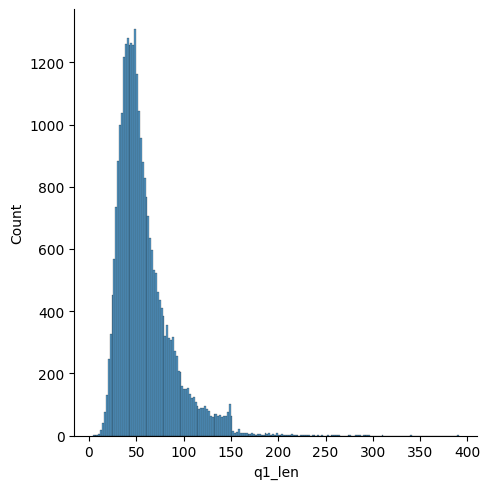

In [98]:
##Length of questions
sns.displot(df['q1_len'])
print('Question with max len',df['q1_len'].max())
print('Question with min len',df['q1_len'].min())
print('Question with avg len',int(df['q1_len'].mean()))

Question with max len 1169
Question with min len 4
Question with avg len 58


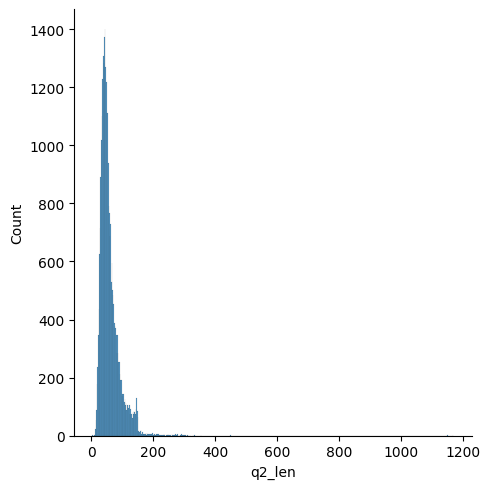

In [99]:
sns.displot(df['q2_len'])
print('Question with max len',df['q2_len'].max())
print('Question with min len',df['q2_len'].min())
print('Question with avg len',int(df['q2_len'].mean()))

Question with max len 73
Question with min len 1
Question with avg len 10


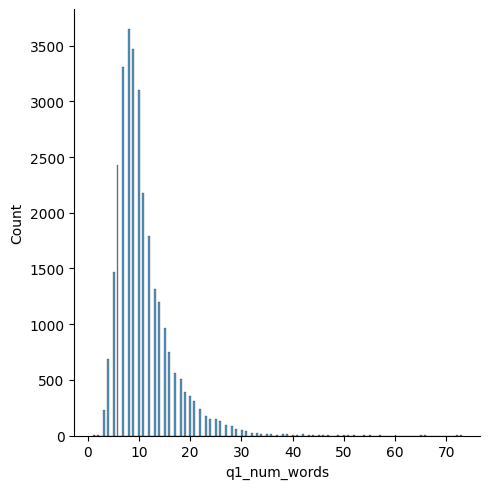

In [100]:
###num of words
sns.displot(df['q1_num_words'])
print('Question with max len',df['q1_num_words'].max())
print('Question with min len',df['q1_num_words'].min())
print('Question with avg len',int(df['q1_num_words'].mean()))

Question with max len 237
Question with min len 1
Question with avg len 10


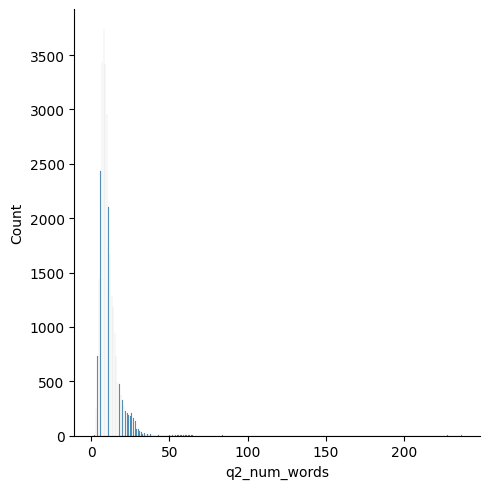

In [101]:
###num of words
sns.displot(df['q2_num_words'])
print('Question with max len',df['q2_num_words'].max())
print('Question with min len',df['q2_num_words'].min())
print('Question with avg len',int(df['q2_num_words'].mean()))

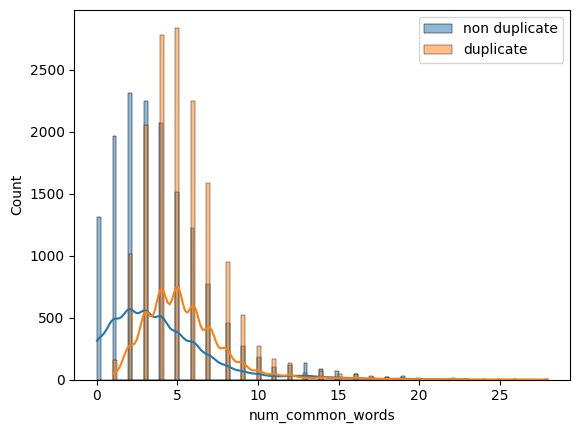

In [102]:
##common words
sns.histplot(df[df['is_duplicate']==0]['num_common_words'] , label='non duplicate',kde=True)
sns.histplot(df[df['is_duplicate']==1]['num_common_words'] , label='duplicate',kde=True)
plt.legend()
plt.show()

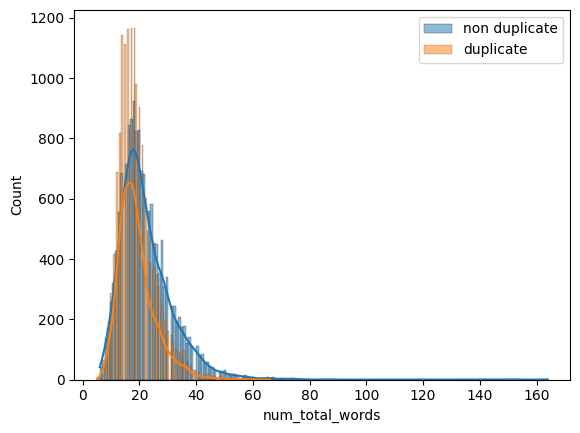

In [72]:
##common words
sns.histplot(df[df['is_duplicate']==0]['num_total_words'] , label='non duplicate',kde=True)
sns.histplot(df[df['is_duplicate']==1]['num_total_words'] , label='duplicate',kde=True)
plt.legend()
plt.show()

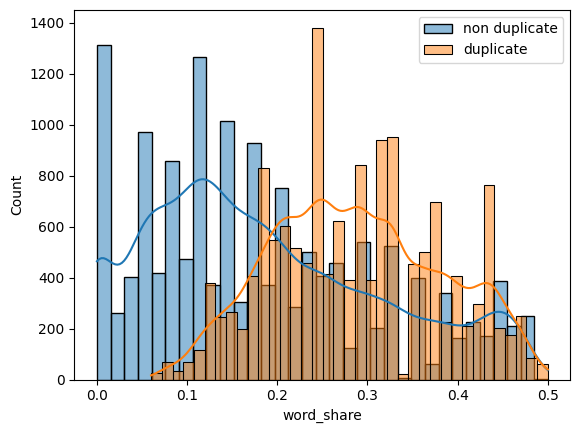

In [73]:
##words share
sns.histplot(df[df['is_duplicate']==0]['word_share'] , label='non duplicate',kde=True)
sns.histplot(df[df['is_duplicate']==1]['word_share'] , label='duplicate',kde=True)
plt.legend()
plt.show()

In [74]:
que_df = df[['question1' , 'question2']]
que_df.head(5)

,question1,question2
0,Why do people give presents/gifts?,Why do people give gifts?
1,How should one improve one's presence of mind?,How can I improve my presence of mind and conc...
2,What are the best pics clicked on a phone?,What are some of the best photos taken from a ...
3,Why makes a woman attractive according to you?,What makes a big woman attractive?
4,Which is the biological purpose of a yawn?,Why does yawning occurs?


In [75]:
feature_df = df.drop(columns=['id','qid1','qid2','question1','question2','Unnamed: 0'])
feature_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,num_total_words,word_share
0,1,34,25,5,5,4,10,0.40
1,1,46,56,8,10,4,18,0.22
2,1,42,57,9,12,6,21,0.29
3,0,46,34,8,6,3,14,0.21
4,0,42,24,8,4,0,12,0.00


In [76]:
##bag of words for feature extraction
from sklearn.feature_extraction.text import CountVectorizer
questions = list(que_df['question1']) + list(que_df['question2'])
cv = CountVectorizer(max_features=3000)     ###for 1 question and for 2 questions it will be 6000
q1_arr ,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [109]:
tempdf1 = pd.DataFrame(q1_arr , index=que_df.index)
tempdf2 = pd.DataFrame(q2_arr , index=que_df.index)
tempdf = pd.concat([tempdf1,tempdf2] , axis=1)
temp_col = ['column1' + str(x) for x in range(6000)]
len(temp_col)
tempdf.columns = temp_col

In [110]:
final_df = pd.concat([tempdf,feature_df],axis=1)

In [115]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.drop('is_duplicate' ,axis=1) , final_df['is_duplicate'] ,test_size=0.2 , random_state=3)
#X_train,X_test,y_train,y_test=train_test_split(feature_df.drop('is_duplicate' ,axis=1) , feature_df['is_duplicate'] ,test_size=0.2 , random_state=3)

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [117]:
accuracy_score(y_test,y_pred)

0.7785

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      3001
           1       0.75      0.84      0.79      2999

    accuracy                           0.78      6000
   macro avg       0.78      0.78      0.78      6000
weighted avg       0.78      0.78      0.78      6000



Accuracy is not so good.
Need to perform text preprocessing , different feature extraction and some feature engginerring. 